#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Proyecto Integrador**
###Tecnológico de Monterrey
###Prof Grettel Barceló Alonso

## **Avance 1**

###**Análisis exploratorio de datos**

* Alejandra Ramírez Romano-A01793144
* Jorge Luis Tapia Peñaloza-A01793013
* Marco Antonio Pérez Castellanos-A01793473


###**Contexto**
En el ámbito de las enfermedades neurológicas, particularmente aquellas con manifestaciones tanto motoras como neuropsiquiátricas, una comprensión detallada de la interacción entre estos síntomas es crucial para el desarrollo de estrategias terapéuticas efectivas. Este proyecto se centra en el análisis exploratorio de clústers de síntomas neuropsiquiátricos (no motores) y su relación con los síntomas motores, un área que, aunque crítica, ha sido relativamente menos explorada en comparación con estudios centrados únicamente en aspectos motores o neuropsiquiátricos por separado.

El análisis exploratorio de datos (EDA) es el primer paso fundamental en este estudio, proporcionando una visión profunda de la estructura y calidad del conjunto de datos recopilado. El objetivo de este EDA es doble: primero, describir y entender la naturaleza de los datos utilizando técnicas estadísticas y de visualización para identificar patrones, tendencias y anomalías; segundo, preparar el conjunto de datos para análisis posteriores mediante la aplicación y justificación de operaciones de preprocesamiento adecuadas como la gestión de valores faltantes y atípicos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.table import Table
import numpy as np
from scipy.stats import chi2_contingency

###**Carga de la información**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/sample_data/Parkinson AI.xlsx"

In [ ]:
try:
    data = pd.read_excel(file_path)
except Exception as e:
    print("Error al cargar el archivo:", e)

data.columns

Index(['Folio', 'Género', 'Año nacimiento', 'Lugar nacimiento',
       'Lugar residencia', 'Años educación', 'Ocupación', 'Toxicos', 'Talla',
       'Peso', 'IMC', 'Diabetes mellitus', 'Año Inicio DM', 'Hipertensión art',
       'Año inicio HAS', 'EVC', 'Año de inicio EVC',
       'Antecedentes Enf Parkinson', 'Tabaquismo', 'Año Sintomas',
       'Año diagnóstico', 'Lado inicial', 'Tipo de inicio', 'MDS-UPDRS',
       'Hoehn y Yahr', 'MOCA', 'Resultado', 'Escala UPDRS:', 'Quien ',
       'Toma medicación', 'Levodopa', 'Horas desde medicación',
       'Estado clínico', 'UPDRS1.1', 'UPDRS1.2', 'UPDRS1.3', 'UPDRS1.4',
       'UPDRS1.5', 'UPDRS1.6', 'UPDRS1.7', 'UPDRS1.8', 'UPDRS2.10',
       'UPDRS2.11', 'UPDRS2.12', 'UPDRS2.13', 'UPDRS3.1', 'UPDRS3.2',
       'UPDRS3.3a', 'UPDRS3.3b', 'UPDRS3.3c', 'UPDRS3.3d', 'UPDRS3.3e',
       'UPDRS3.4a', 'UPDRS3.4b', 'UPDRS3.5a', 'UPDRS3.5b', 'UPDRS3.6a',
       'UPDRS3.6b', 'UPDRS3.7a', 'UPDRS3.7b', 'UPDRS3.8a', 'UPDRS3.8b',
       'UPDRS3.9', 'UPD

In [ ]:
print(f"El tamaño de la base es: {data.shape} y consta de las siguientes columnas:\n{data.columns.tolist()}")



El tamaño de la base es: (235, 80) y consta de las siguientes columnas:
['Folio', 'Género', 'Año nacimiento', 'Lugar nacimiento', 'Lugar residencia', 'Años educación', 'Ocupación', 'Toxicos', 'Talla', 'Peso', 'IMC', 'Diabetes mellitus', 'Año Inicio DM', 'Hipertensión art', 'Año inicio HAS', 'EVC', 'Año de inicio EVC', 'Antecedentes Enf Parkinson', 'Tabaquismo', 'Año Sintomas', 'Año diagnóstico', 'Lado inicial', 'Tipo de inicio', 'MDS-UPDRS', 'Hoehn y Yahr', 'MOCA', 'Resultado', 'Escala UPDRS:', 'Quien ', 'Toma medicación', 'Levodopa', 'Horas desde medicación', 'Estado clínico', 'UPDRS1.1', 'UPDRS1.2', 'UPDRS1.3', 'UPDRS1.4', 'UPDRS1.5', 'UPDRS1.6', 'UPDRS1.7', 'UPDRS1.8', 'UPDRS2.10', 'UPDRS2.11', 'UPDRS2.12', 'UPDRS2.13', 'UPDRS3.1', 'UPDRS3.2', 'UPDRS3.3a', 'UPDRS3.3b', 'UPDRS3.3c', 'UPDRS3.3d', 'UPDRS3.3e', 'UPDRS3.4a', 'UPDRS3.4b', 'UPDRS3.5a', 'UPDRS3.5b', 'UPDRS3.6a', 'UPDRS3.6b', 'UPDRS3.7a', 'UPDRS3.7b', 'UPDRS3.8a', 'UPDRS3.8b', 'UPDRS3.9', 'UPDRS3.10', 'UPDRS3.11', 'UPDRS3.12

In [ ]:
data.head()

Folio     Género Año nacimiento Lugar nacimiento Lugar residencia  \
0      1  Masculino           1967          Sinaloa        Monterrey   
1      2   Femenino           1960  San Luis Potosi      Gral. Teran   
2      3  Masculino           1971           Oaxaca        El Carmen   
3      4   Femenino           1944          Nayarit        Monterrey   
4      5  Masculino           1953       Tamaulipas       Tamaulipas   

   Años educación      Ocupación   Toxicos  Talla  Peso  ...  UPDRS3.16a  \
0            17.0  profesionista        No   1.99  78.0  ...     Ausente   
1             8.0          hogar        No   1.54  77.0  ...     Ausente   
2             6.0            NaN      Humo   1.63  73.6  ...     Ausente   
3            12.0            NaN        No   1.60  53.0  ...     Ausente   
4            12.0            NaN  Petroleo   1.68  90.0  ...     Ausente   

  UPDRS3.16b UPDRS3.17a UPDRS3.17b  UPDRS3.17c UPDRS3.17d  UPDRS3.17e  \
0    Ausente    Ausente    Ausente     Ausente    Ausente     Ausente   
1    Ausente   Presente   Presente    Presente   Presente    Presente   
2    Ausente    Ausente    Ausente     Ausente    Ausente     Ausente   
3   Presente   Presente   Presente    Presente   Presente     Ausente   
4    Ausente    Ausente    Ausente     Ausente    Ausente     Ausente   

  UPDRS3.18 ¿Discinesias?  ¿Interfirieron?  
0   Ausente            No               No  
1  Presente            No               No  
2   Ausente            No               No  
3  Presente            Si               No  
4   Ausente            No               No  

[5 rows x 80 columns]

### Revisando los tipos de datos de cada columna
Una vez que visualizamos los encabezados de la tabla procedemos a explorar los tipos de datos que tenemos en cada una de las variables y determinar si son del tipo correcto de acuerdo a lo que representan.

In [ ]:
# Crear un DataFrame para la tabla
table_data = pd.DataFrame({
    "Nombre de la variable": data.columns,
    "Tipo de dato": [data[col].dtype for col in data.columns]
})

table_data

Nombre de la variable Tipo de dato
0                  Folio        int64
1                 Género       object
2         Año nacimiento       object
3       Lugar nacimiento       object
4       Lugar residencia       object
..                   ...          ...
75            UPDRS3.17d       object
76            UPDRS3.17e       object
77             UPDRS3.18       object
78         ¿Discinesias?       object
79       ¿Interfirieron?       object

[80 rows x 2 columns]

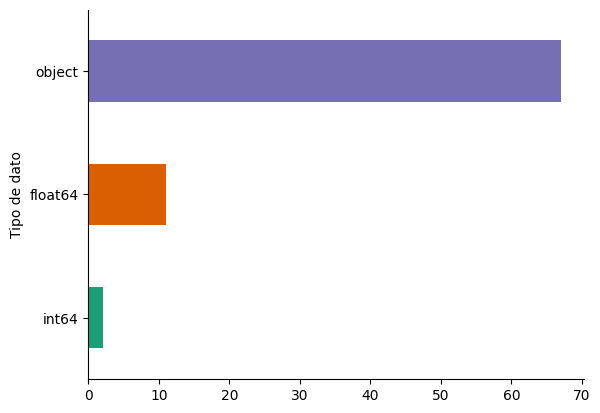

In [ ]:
table_data.groupby('Tipo de dato').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###**Datos faltantes**

In [ ]:
missing_values = data.isnull().sum()
percentage_missing = (missing_values / data.shape[0]) * 100
percentage_missing = percentage_missing.round(1)  # Redondeo a 1 decimal

# Creación del DataFrame con nombres de columnas específicos
df = pd.concat([missing_values, percentage_missing], axis=1, keys=['# de casos', '% valores nulos'])
df = df.sort_values(by='% valores nulos', ascending=False).head(20)
df['% valores nulos'] = df['% valores nulos'].astype(str) + '%'

print(df)

                            # de casos % valores nulos
Escala UPDRS:                      235          100.0%
Año de inicio EVC                  232           98.7%
Año Inicio DM                      217           92.3%
Año inicio HAS                     209           88.9%
Lugar nacimiento                   132           56.2%
Ocupación                          115           48.9%
Horas desde medicación              96           40.9%
IMC                                 90           38.3%
Talla                               90           38.3%
Peso                                90           38.3%
Lado inicial                        86           36.6%
Hipertensión art                    85           36.2%
EVC                                 85           36.2%
Diabetes mellitus                   84           35.7%
Año diagnóstico                     84           35.7%
Toxicos                             84           35.7%
Años educación                      83           35.3%
Tabaquismo

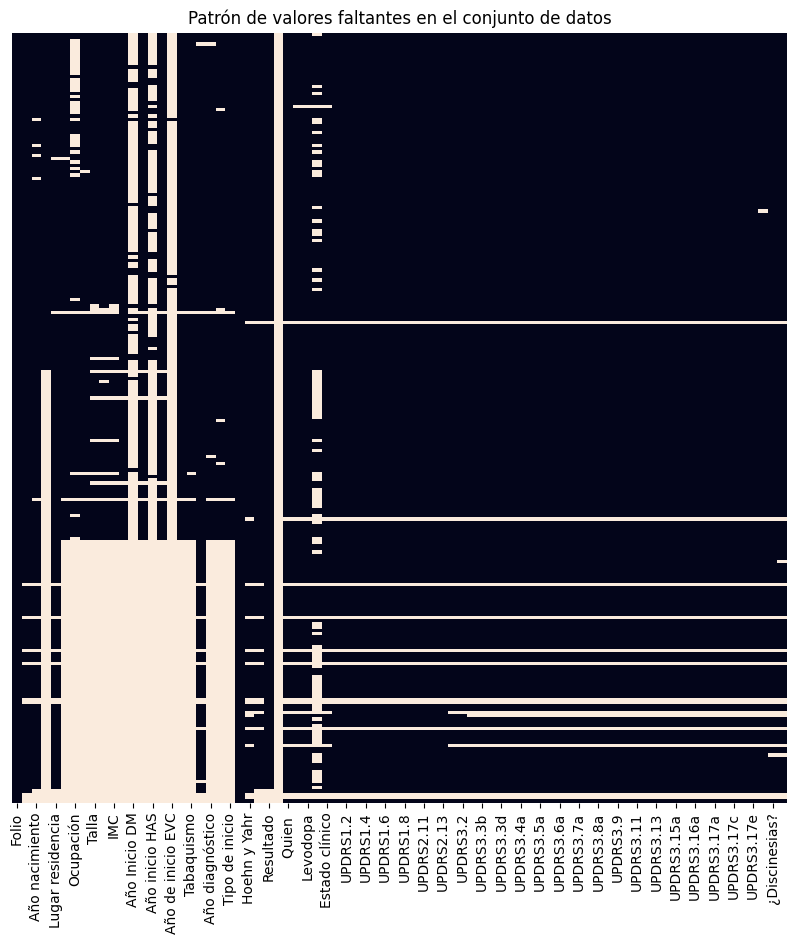

In [ ]:
missing_values_plot = data.isnull()
plt.figure(figsize=(10, 10))
sns.heatmap(missing_values_plot, cbar=False, yticklabels=False)
plt.title("Patrón de valores faltantes en el conjunto de datos")
plt.show()

La gráfica que mostramos ilustra el patrón de valores faltantes en el conjunto de datos utilizando una matriz de ausencia (a menudo llamada "mapa de calor de valores faltantes"). En este tipo de visualización:

* Las áreas oscuras (negras) representan la presencia de datos (no faltantes).
* Las áreas claras (blancas) representan la ausencia de datos (faltantes).

**Interpretación del patrón de valores faltantes**

1. Concentración de valores faltantes:Observamos una concentración significativa de valores faltantes en ciertas columnas como "Año Inicio DM", "Año inicio HAS", y "Año de inicio EVC". Esto debido a que solo existe para aquellas personas que presentan diabetes,hipertensión y evento cerebro vascular, respectivamente.
"Lugar nacimiento" y "Ocupación" también muestran una alta cantidad de datos faltantes, lo que sugiere que esta información no fue recabada consistentemente.

2. Variables con pocos o ningún valor faltante:
Variables como "Folio", "Género", "Año nacimiento", y las relacionadas con evaluaciones específicas de la enfermedad de Parkinson (por ejemplo, "MDS-UPDRS", "Hoehn y Yahr", "MOCA") están casi completamente llenas. Esto indica que son datos que probablemente fueron considerados críticos y, por lo tanto, recopilados de manera más rigurosa.

3. Implicaciones para el análisis:Las columnas con muchos datos faltantes podrían necesitar ser consideradas para imputación, descarte o análisis separado, dependiendo de su relevancia para los objetivos del estudio. Por ejemplo, si el "Año de inicio" de ciertas condiciones no es crítico para el análisis primario, estas columnas podrían ser excluidas para simplificar el análisis.
La presencia de valores faltantes en columnas importantes podría requerir métodos de imputación si esos datos son esenciales para el análisis.

###**Selección de columnas**


**Variables numéricas**

Existen variables que dado el contexto no aportan al análisis , por ejemplo el folio que nos ayuda a identificar al paciente , los año de inicio de alguna enfermedad crónica (Año Inicio DM", "Año inicio HAS", y "Año de inicio EVC") que directamente no aportarían , en etapas posteriores calcularemos "Años con DM" , "Años con HAS" y "Años con EVC", que tomará el valor de "0" para quien no padezca la enfermedad y de esa forma evitamos valores vacios.

Por tanto a continuación hacemos la omisión de las anteriores.

In [ ]:
# Seleccion de columnas númericas relevantes
numeric_cols = ['Años educación', 'Talla', 'Peso','IMC','Año Sintomas','Año diagnóstico','MDS-UPDRS',
                'Hoehn y Yahr','MOCA']

In [ ]:
summary_statistics = data[numeric_cols].describe()
summary_statistics

Años educación       Talla        Peso         IMC  Año Sintomas  \
count      152.000000  145.000000  145.000000  145.000000    222.000000   
mean        11.657895    3.423103   70.932000   25.548852   2010.860360   
std          4.926083   15.432141   17.335889    6.051948      6.659349   
min          0.000000    1.000000    1.740000    0.000000   1991.000000   
25%          9.000000    1.580000   61.000000   22.985398   2007.000000   
50%         12.000000    1.650000   69.000000   25.476660   2012.000000   
75%         16.000000    1.740000   82.000000   28.320312   2015.000000   
max         27.000000  160.000000  120.000000   47.000000   2023.000000   

       Año diagnóstico   MDS-UPDRS  Hoehn y Yahr        MOCA  
count       151.000000  235.000000    221.000000  222.000000  
mean       2004.801325   66.429787      2.461538   22.792793  
std          81.357812   38.982332      0.896770    5.236691  
min        1014.000000    0.000000      0.000000    3.000000  
25%        2008.000000   38.000000      2.000000   20.000000  
50%        2013.000000   62.000000      2.000000   24.000000  
75%        2015.000000   94.000000      3.000000   27.000000  
max        2022.000000  193.000000      5.000000   30.000000

In [ ]:
skewed_columns = data.select_dtypes(include=['int64', 'float64']).skew()
skewed_columns

Folio                 0.000000
Años educación        0.044503
Talla                 9.079190
Peso                 -0.137703
IMC                  -1.004178
Año inicio HAS       -1.308504
Año de inicio EVC     0.157628
Año Sintomas         -0.524578
Año diagnóstico     -12.201377
MDS-UPDRS             0.438402
MOCA                 -1.043046
Escala UPDRS:              NaN
dtype: float64

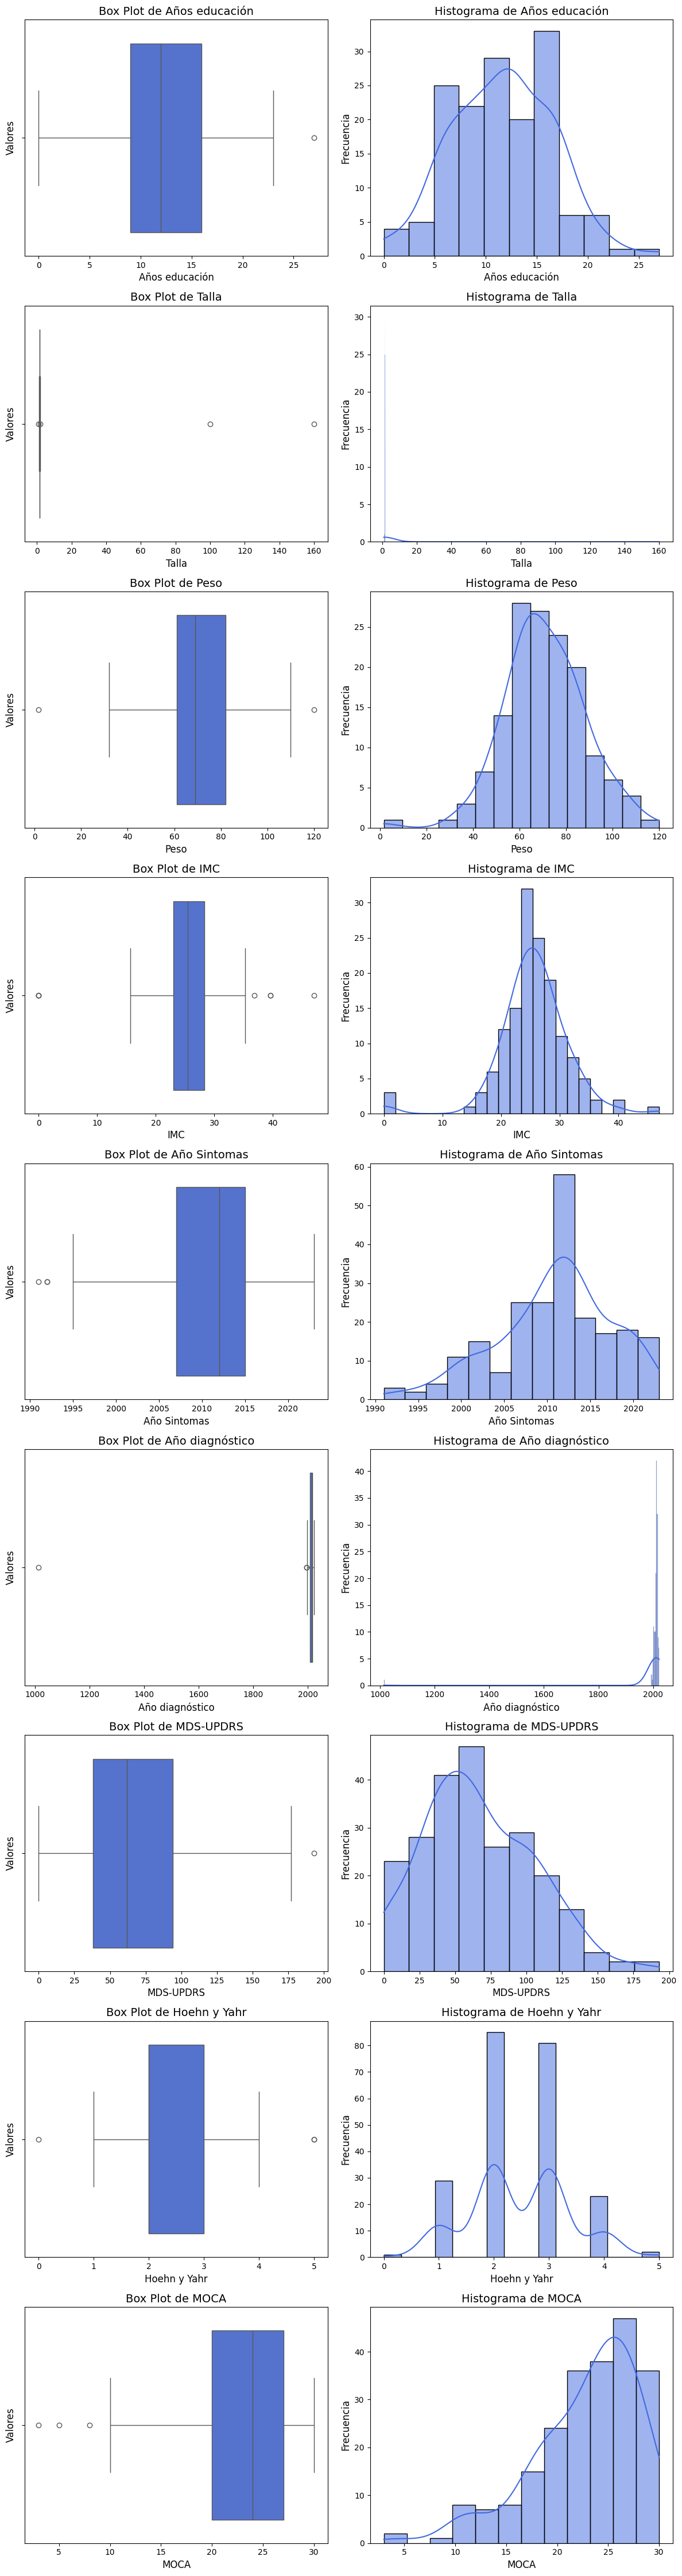

In [ ]:
royal_blue = "#4169e1"

# Selección de las columnas numéricas
# numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Configuración de los subplots para tener dos gráficos por variable
fig, axs = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(12, 5 * len(numeric_cols)))

# Recorrer cada variable numérica para crear boxplot y histograma
for i, col in enumerate(numeric_cols):
    if len(numeric_cols) == 1:
        ax1 = axs[0]
        ax2 = axs[1]
    else:
        ax1 = axs[i, 0]
        ax2 = axs[i, 1]

    try:
        # Crear un boxplot
        sns.boxplot(x=data[col], ax=ax1, color=royal_blue)
        ax1.set_title(f'Box Plot de {col}', fontsize=14)
        ax1.set_xlabel(f'{col}', fontsize=12)
        ax1.set_ylabel('Valores', fontsize=12)

        # Crear un histograma
        sns.histplot(data[col], kde=True, ax=ax2, color=royal_blue)
        ax2.set_title(f'Histograma de {col}', fontsize=14)
        ax2.set_xlabel(f'{col}', fontsize=12)
        ax2.set_ylabel('Frecuencia', fontsize=12)
    except Exception as e:
        print(f"Error en la columna {col}: {e}")

# Ajustar automáticamente los subplots para que no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

A continuación, proporcionamos un análisis de cada par de gráficos para las variables mostradas:

**Años de educación:**
* Box Plot: La mayoría de los datos están concentrados
alrededor de los 15 años, con pocos valores atípicos.
* Histograma: La distribución es aproximadamente normal, con un pico cerca de los 15 años.

**Talla:**
* Box Plot: Hay valores atípicos significativos por encima del rango máximo regular.
* Histograma: La mayoría de las personas se concentran alrededor de una talla promedio (entre 60 y 100).

**Peso:**
* Box Plot: Muestra una distribución con algunos valores atípicos tanto en el extremo inferior como en el superior.
* Histograma: Es aproximadamente normal, centrada alrededor de 60-80 kg.

**IMC (Índice de Masa Corporal):**
* Box Plot: Algunos valores atípicos, especialmente hacia el extremo superior.
* Histograma: Distribución con un ligero sesgo hacia la derecha, centrado alrededor de 20-30.

**Año Síntomas:**
* Box Plot: Amplia distribución de datos a lo largo de los años, con algunos valores atípicos recientes.
* Histograma: Se observan picos en años específicos, lo que podría indicar eventos o registros específicos.

**Año Diagnóstico:**
* Box Plot: Concentración de datos más recientes con algunos valores atípicos extremos en el pasado lejano.
* Histograma: La mayoría de los diagnósticos ocurrieron en años recientes, con pocos registros antiguos.

**MDS-UPDRS (Escala de Calificación de la Enfermedad de Parkinson):**
* Box Plot: Distribución uniforme con algunos valores atípicos.
* Histograma: La mayoría de los valores están por debajo de 50, con una distribución ligeramente sesgada hacia la derecha.

**Hoehn y Yahr:**
* Box Plot: Concentración de datos entre 2 y 3, con algunos valores atípicos.
* Histograma: Picos claros en grados específicos, lo que sugiere etapas comunes de progresión de la enfermedad.

**MOCA (Evaluación Cognitiva de Montreal):**
* Box Plot: Algunos valores atípicos extremos hacia el extremo inferior.
* Histograma: Sesgo hacia resultados más bajos, con un pico alrededor de 25-30.

**Variables categóricas**



In [ ]:
# Seleccion de columnas categóricas relevantes
categorical_columns= ['Género','Diabetes mellitus','Hipertensión art', 'EVC', 'Antecedentes Enf Parkinson',
                      'Tabaquismo', 'Lado inicial', 'Tipo de inicio', 'Resultado', 'Toma medicación', 'Levodopa',
                      'Estado clínico', 'UPDRS1.1', 'UPDRS1.2', 'UPDRS1.3', 'UPDRS1.4', 'UPDRS1.5',
                      'UPDRS1.6', 'UPDRS1.7', 'UPDRS1.8', 'UPDRS2.10', 'UPDRS2.11', 'UPDRS2.12', 'UPDRS2.13', 'UPDRS3.1', 'UPDRS3.2',
                      'UPDRS3.3a', 'UPDRS3.3b', 'UPDRS3.3c', 'UPDRS3.3d', 'UPDRS3.3e', 'UPDRS3.4a', 'UPDRS3.4b', 'UPDRS3.5a', 'UPDRS3.5b',
                      'UPDRS3.6a', 'UPDRS3.6b', 'UPDRS3.7a', 'UPDRS3.7b', 'UPDRS3.8a', 'UPDRS3.8b', 'UPDRS3.9', 'UPDRS3.10', 'UPDRS3.11',
                      'UPDRS3.12', 'UPDRS3.13', 'UPDRS3.14', 'UPDRS3.15a', 'UPDRS3.15b', 'UPDRS3.16a', 'UPDRS3.16b', 'UPDRS3.17a', 'UPDRS3.17b',
                      'UPDRS3.17c', 'UPDRS3.17d', 'UPDRS3.17e', 'UPDRS3.18', '¿Discinesias?', '¿Interfirieron?']

In [ ]:
# Lista para almacenar los datos de cada columna
rows = []

# Rellenar la lista con la información de cada columna categórica
for col in categorical_columns:
    unique_values = data[col].unique()  # Obtener valores únicos
    unique_count = len(unique_values)  # Contar número de valores únicos
    value_counts = data[col].value_counts(normalize=True) * 100  # Contar la frecuencia en porcentaje de cada valor
    value_counts = value_counts.round(2)  # Redondear los porcentajes a dos decimales
    # Crear un diccionario con la información de la columna y agregarlo a la lista
    rows.append({
        'Variable': col,
        'Valores Únicos': unique_values,
        'Número de Valores Únicos': unique_count,
        'Frecuencia en %': dict(value_counts)  # Convertir a diccionario para un mejor formato
    })

# Crear DataFrame a partir de la lista
categorical_summary = pd.DataFrame(rows)

# Mostrar el DataFrame resumen
categorical_summary

Variable  \
0                       Género   
1            Diabetes mellitus   
2             Hipertensión art   
3                          EVC   
4   Antecedentes Enf Parkinson   
5                   Tabaquismo   
6                 Lado inicial   
7               Tipo de inicio   
8                    Resultado   
9              Toma medicación   
10                    Levodopa   
11              Estado clínico   
12                    UPDRS1.1   
13                    UPDRS1.2   
14                    UPDRS1.3   
15                    UPDRS1.4   
16                    UPDRS1.5   
17                    UPDRS1.6   
18                    UPDRS1.7   
19                    UPDRS1.8   
20                   UPDRS2.10   
21                   UPDRS2.11   
22                   UPDRS2.12   
23                   UPDRS2.13   
24                    UPDRS3.1   
25                    UPDRS3.2   
26                   UPDRS3.3a   
27                   UPDRS3.3b   
28                   UPDRS3.3c   
29                   UPDRS3.3d   
30                   UPDRS3.3e   
31                   UPDRS3.4a   
32                   UPDRS3.4b   
33                   UPDRS3.5a   
34                   UPDRS3.5b   
35                   UPDRS3.6a   
36                   UPDRS3.6b   
37                   UPDRS3.7a   
38                   UPDRS3.7b   
39                   UPDRS3.8a   
40                   UPDRS3.8b   
41                    UPDRS3.9   
42                   UPDRS3.10   
43                   UPDRS3.11   
44                   UPDRS3.12   
45                   UPDRS3.13   
46                   UPDRS3.14   
47                  UPDRS3.15a   
48                  UPDRS3.15b   
49                  UPDRS3.16a   
50                  UPDRS3.16b   
51                  UPDRS3.17a   
52                  UPDRS3.17b   
53                  UPDRS3.17c   
54                  UPDRS3.17d   
55                  UPDRS3.17e   
56                   UPDRS3.18   
57               ¿Discinesias?   
58             ¿Interfirieron?   

                                       Valores Únicos  \
0                          [Masculino, Femenino, nan]   
1                       [No, Si, no, Sí, nan, NO, SI]   
2                  [No, Si, no, nan, Sí, NO, SI, NO ]   
3                               [No, Si, nan, NO, SI]   
4                                   [No, Si, nan, NO]   
5                            [Nunca, Suspendido, nan]   
6        [Izquierdo, Derecho, Ambos, nan, Izquierdo ]   
7   [Rigidez/Bradicinesia, Temblor, Alteración de ...   
8                            [Normal, Deterioro, nan]   
9                                   [Si, No, nan, Sí]   
10                                  [No, Si, nan, Sí]   
11                            [Off, On, nan, on, off]   
12                           [Ausente, Presente, nan]   
13                           [Ausente, Presente, nan]   
14                           [Presente, Ausente, nan]   
15                           [Presente, Ausente, nan]   
16                           [Presente, Ausente, nan]   
17                           [Ausente, Presente, nan]   
18                           [Presente, Ausente, nan]   
19                           [Presente, Ausente, nan]   
20                           [Ausente, Presente, nan]   
21                           [Ausente, Presente, nan]   
22                           [Ausente, Presente, nan]   
23                           [Ausente, Presente, nan]   
24                           [Presente, Ausente, nan]   
25                           [Presente, Ausente, nan]   
26                           [Presente, Ausente, nan]   
27                           [Presente, Ausente, nan]   
28                           [Presente, Ausente, nan]   
29                           [Presente, Ausente, nan]   
30                           [Presente, Ausente, nan]   
31                           [Presente, Ausente, nan]   
32                           [Presente, Ausente, nan]   
33                           [Presente, Aus

El DataFrame que construimos contiene un resumen de las variables categóricas con las siguientes columnas:

1. Variable: Nombre de la variable categórica.
2. Valores Únicos: Los diferentes valores que toma cada variable, incluyendo valores nulos (indicados con nan).
3. Número de Valores Únicos: La cantidad de valores únicos encontrados para cada variable.
4. Frecuencia en %: La frecuencia relativa de cada valor en porcentaje.

**Análisis por Variable**

**Género:**
* Valores: Masculino, Femenino, y datos no especificados (nan).
* Frecuencia: 65.49% masculino y 34.51% femenino.
* Observaciones: La distribución muestra mayor proporción de individuos masculinos en el conjunto de datos.

**Diabetes mellitus:**
* Valores: Variaciones en la escritura como 'No', 'Si', 'NO', 'SI', incluyendo mayúsculas, minúsculas y valores nulos.
* Frecuencia: Mayor porcentaje de individuos sin diabetes, pero la división de respuestas entre formatos sugiere un posible error en la entrada de datos o falta de normalización en las respuestas.
* Acción Recomendada: Normalizar las respuestas a un formato consistente (por ejemplo, todo en mayúsculas o minúsculas) para un análisis más claro.

**Hipertensión arterial:**
* Valores: Similar a la diabetes mellitus, con inconsistencias en la escritura ('No', 'Si', 'NO', 'SI', 'no', 'NO ' con un espacio extra).
* Frecuencia: Una gran cantidad de individuos reporta no tener hipertensión, pero de nuevo, la falta de uniformidad en las respuestas puede afectar la interpretación.
* Acción Recomendada: Limpiar y estandarizar las entradas.

**EVC (Evento Vascular Cerebral):**
* Valores: 'No', 'Si', 'NO', 'SI', y valores nulos.
* Frecuencia: Predominantemente 'No', lo cual indica que la mayoría de los individuos no han sufrido un EVC.
* Acción Recomendada: Estandarizar los valores 'NO' y 'SI'.

**Antecedentes Enf Parkinson:**
* Valores: 'No', 'Si', y 'NO'.
* Frecuencia: Mayor número de personas sin antecedentes familiares de enfermedad de Parkinson, lo cual es relevante para entender si hay un factor hereditario clave
* Acción Recomendada: Asegurar consistencia en las respuestas.

**Sugerencias Generales**

1. Estandarización de Datos: Es fundamental estandarizar las respuestas para todas las variables categóricas para eliminar las duplicidades causadas por diferencias en mayúsculas, minúsculas o espacios.

2. Tratamiento de Valores Nulos: Decidir cómo manejar los valores nan dependiendo de los requisitos del análisis posterior y la proporción de faltantes para determinar si es posible imputar u omitir.

3. Verificación de Datos: Verificar con la fuente de los datos la interpretación correcta de las variables y la integridad del conjunto de datos.



In [ ]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2))
    stats = chi2_contingency(crosstab)[0]
    cram_V = stats / (np.sum(crosstab) * (min(crosstab.shape) - 1))
    return cram_V

CategoricalData=data[categorical_columns]

In [ ]:

def cramers_col(column_name):
    col = pd.Series(np.empty(CategoricalData.columns.shape), index=CategoricalData.columns, name=column_name)
    for row in CategoricalData:
        cram = cramers_V(CategoricalData[column_name], CategoricalData[row])
        col[row] = round(cram, 2)
    return col

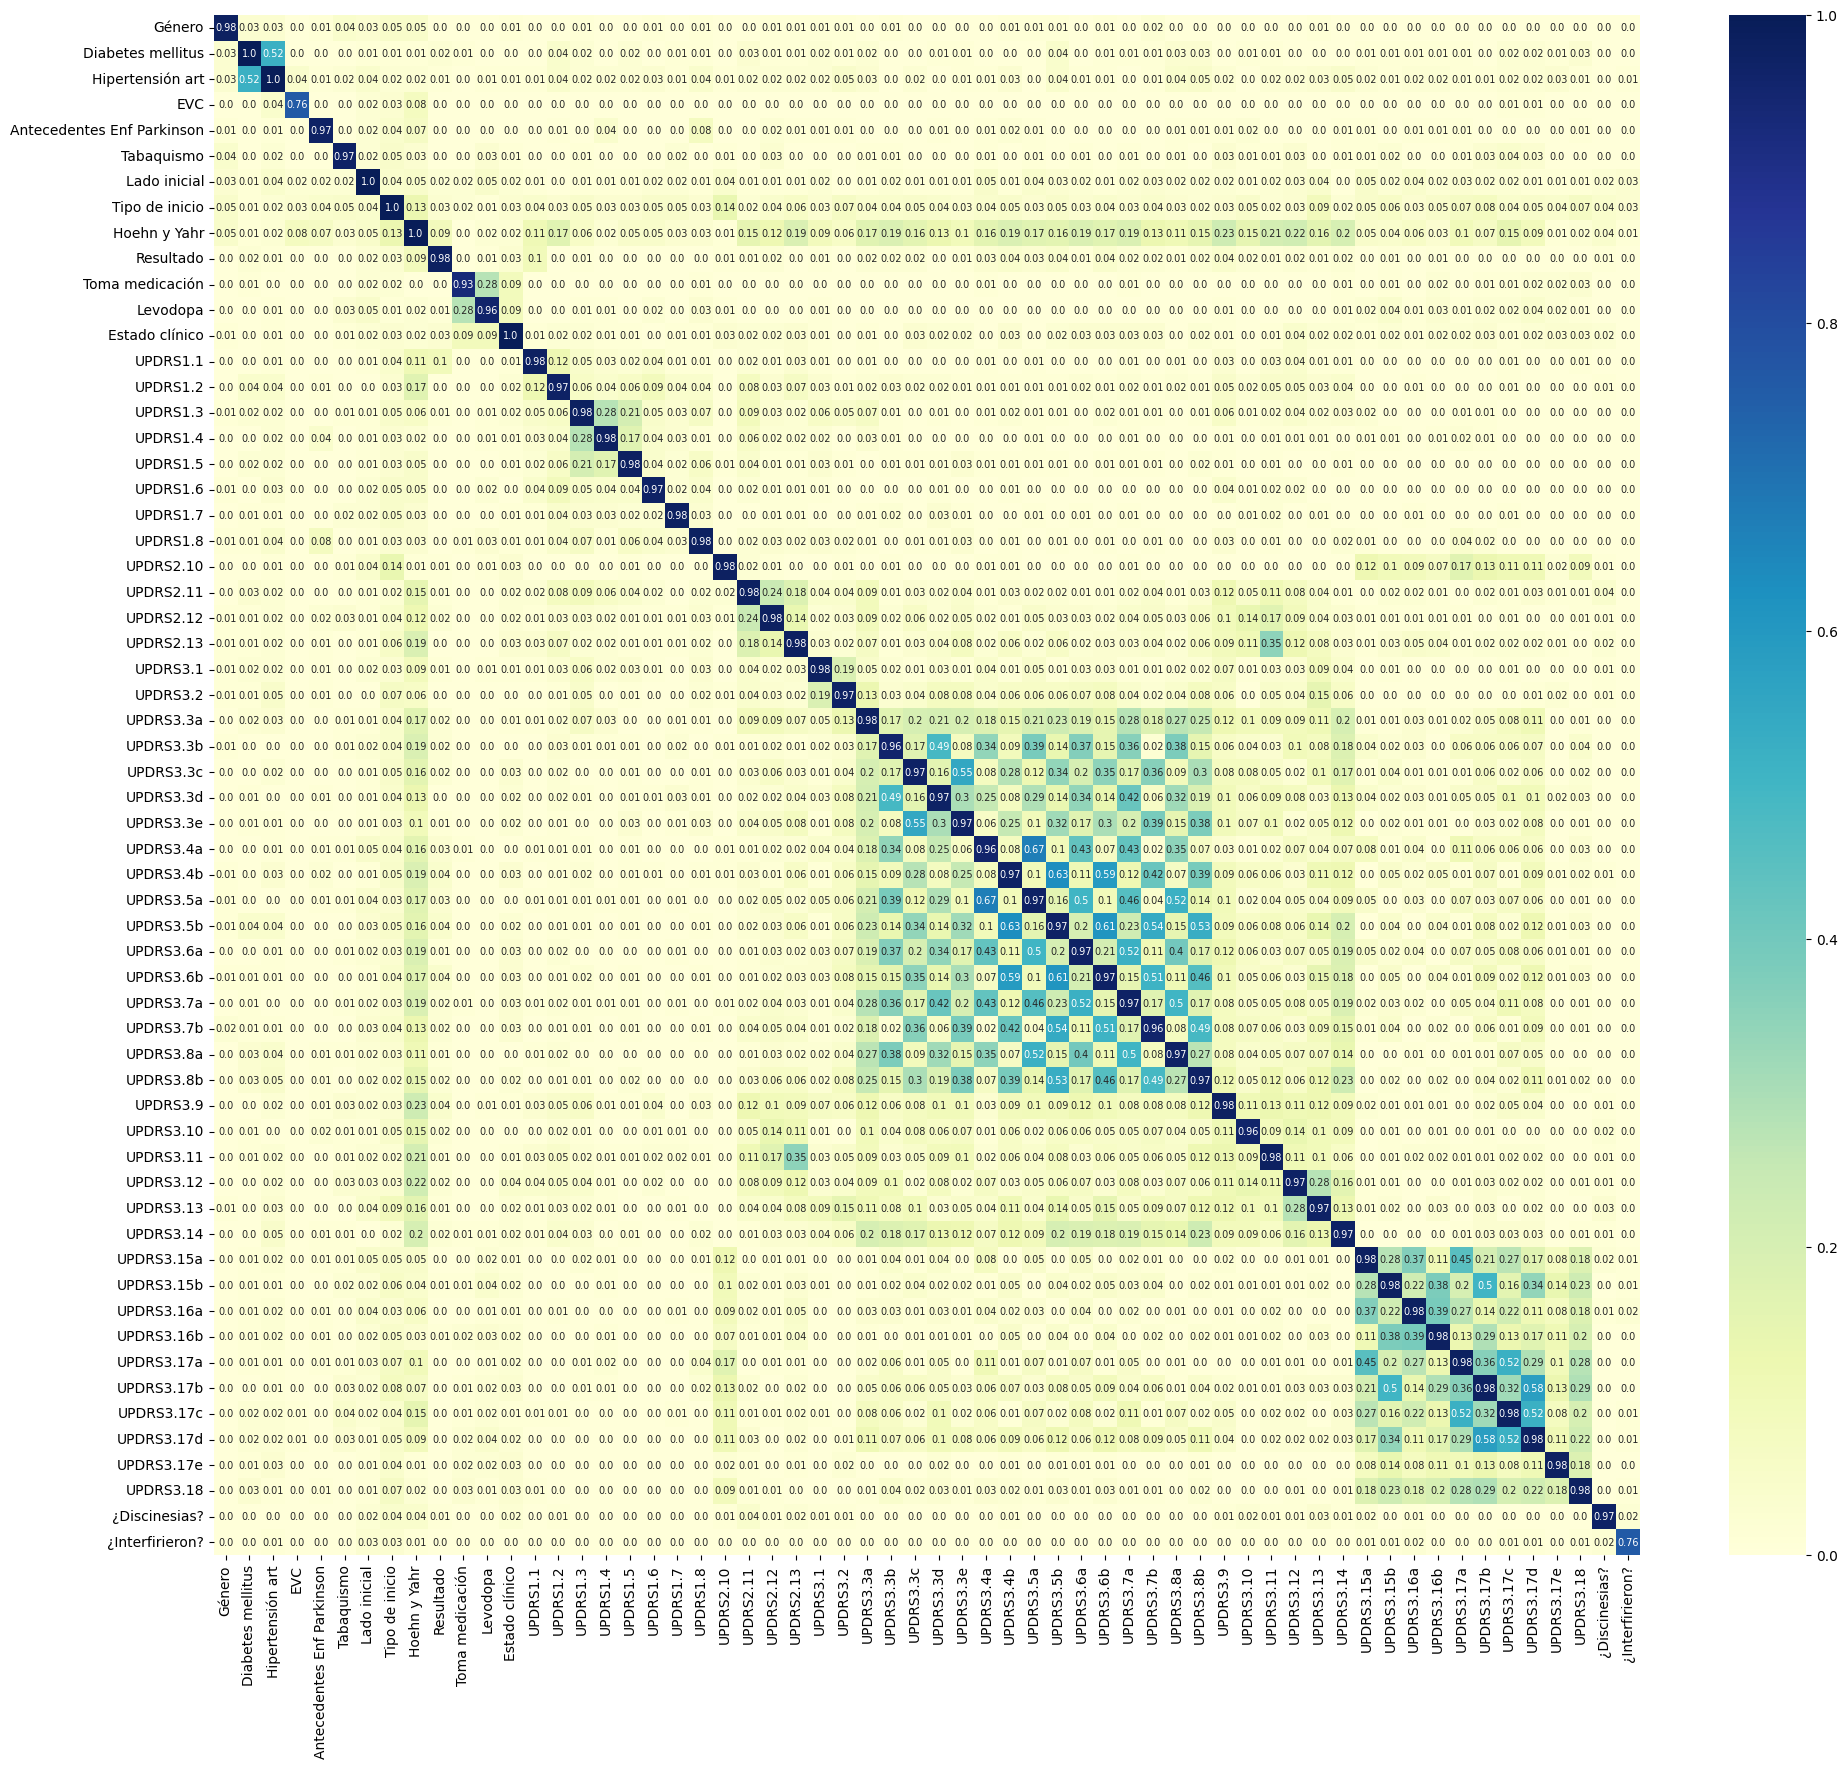

In [ ]:
result = CategoricalData.apply(lambda column: cramers_col(column.name))
result_rounded = result.round(2).astype(str)


plt.figure(figsize=(23, 20))
sns.heatmap(result, annot=result_rounded, fmt='', cmap='YlGnBu', annot_kws={"size": 7})


plt.show()

Los datos en su mayoría son del tipo categorico. Para evitar el problema de la dimensionalidad por onehotencoding, decidimos utilizar Camer's V que cuantifica la fuerza de la asociación entre dos variables categóricas. Su valor varía entre 0 (sin asociación) y 1 (asociación perfecta).

Para calcular Cramér’s V, se siguen estos pasos:

1. Crea una tabla de contingencia de las dos variables.
2. Calcula la estadística del test de chi-cuadrado de la tabla de contingencia.
3. Usa la fórmula de Cramér’s V: V=n∗(min(C,R)−1)χ2​
 donde χ² es la estadística del test de chi-cuadrado, n es el total de observaciones y min(C,R) es el mínimo entre el número de columnas y filas en la tabla de contingencia.

En este codigo primero, define dos funciones: cramers_V que calcula el valor de Cramér’s V para dos variables, y cramers_col que aplica cramers_V a una columna específica con todas las demás columnas en los datos. Luego, aplica cramers_col a cada columna en los datos categóricos y almacena los resultados. Finalmente, crea un mapa de calor de los resultados usando seaborn y lo muestra.



# Analisis especifico del problema

## Pretratamiento

In [ ]:
updrs_cols = [col for col in data.columns if "UPDRS" in col]

for col in updrs_cols:
    data[col] = data[col].replace({"Ausente": 0, "Presente": 1})
data["¿Discinesias?"].replace("Sí", "Si", inplace = True)
data.head()

In [ ]:
replace_updrs = {"UPDRS1.1": "Estado mental (p. ej., claridad, atención y memoria).",
                 "UPDRS1.2": "Estado de ánimo y comportamiento (p. ej., depresión, motivación).",
                 "UPDRS1.3": "Actividad del día a día y comportamiento.",
                 "UPDRS1.4": "Motivación/Iniciativa.",
                 "UPDRS1.5": "Apatia",
                 "UPDRS1.6": "Control de emocional",
                 "UPDRS1.7": "Problema de sueño",
                 "UPDRS1.8": "Somnolencia diurna",
                 "UPDRS3.1": "Lenguaje",
                 "UPDRS3.2": "Expresión facial",
                 "UPDRS3.3a": "Rigidez - Cuello",
                 "UPDRS3.3b": "Rigidez - MSD",
                 "UPDRS3.3c": "Rigidez - MSI",
                 "UPDRS3.3d": "Rigidez - MID",
                 "UPDRS3.3e": "Rigidez - MII",
                 "UPDRS3.4a": "Golpeteo de dedos (tapping) - Mano derecha",
                 "UPDRS3.4b": "Golpeteo de dedos (tapping) - Mano izquierda",
                 "UPDRS3.5a": "Movimientos de las manos - Mano derecha",
                 "UPDRS3.5b": "Movimientos de las manos - Mano izquierda",
                 "UPDRS3.6a": "Pronación-supinación - Mano derecha",
                 "UPDRS3.6b": "Pronación-supinación - Mano izquierda",
                 "UPDRS3.7a": "Golpeteo con los dedos de los pies - Pie derecho",
                 "UPDRS3.7b": "Golpeteo con los dedos de los pies - Pie izquierdo",
                 "UPDRS3.8a": "Agilidad con las piernas - Pierna derecha",
                 "UPDRS3.8b": "Agilidad con las piernas - Pierna izquierda",
                 "UPDRS3.9": "Levantarse de la silla",
                 "UPDRS3.10": "Marcha",
                 "UPDRS3.11": "Congelación de la marcha",
                 "UPDRS3.12": "Estabilidad postural",
                 "UPDRS3.13": "Postura",
                 "UPDRS3.14": "Espontaneidad global de movimientos",
                 "UPDRS3.15a": "Temblor postural - Mano derecha",
                 "UPDRS3.15b": "Temblor postural - Mano izquierda",
                 "UPDRS3.16a": "Temblor de acción - Mano derecha",
                 "UPDRS3.16b": "Temblor de acción - Mano izquierda",
                 "UPDRS3.17a": "Amplitud del temblor de reposo - MSD",
                 "UPDRS3.17b": "Amplitud del temblor de reposo - MSI",
                 "UPDRS3.17c": "Amplitud del temblor de reposo - MID",
                 "UPDRS3.17d": "Amplitud del temblor de reposo - MII",
                 "UPDRS3.17e": "Amplitud del temblor de reposo - Labio/mandíbula",
                 "UPDRS3.18": "Persistencia del temblor de reposo"


                }

## Análisis Comparativo de Síntomas en Pacientes de Parkinson con y sin Discinesias

La siguiente tabla, se presenta un análisis comparativo de diversos síntomas motores y no motores de la enfermedad de Parkinson en pacientes con y sin discinesias. Esta comparativa es entre el sintoma más común de la enfermedad de parkinson y sintomas no motores:

- **Estado mental**: Los pacientes sin discinesias muestran una mejor claridad, atención y memoria (promedio 0.43) comparado con aquellos con discinesias (promedio 0.35).
- **Estado de ánimo y comportamiento**: Los pacientes con discinesias parecen experimentar niveles más altos de depresión y problemas de motivación (promedio 0.28) que aquellos sin discinesias (promedio 0.16).
- **Actividad del día a día y comportamiento**: Ambos grupos muestran poca diferencia en este aspecto, aunque los pacientes con discinesias reportan ligeramente más problemas (promedio 0.60) en comparación con aquellos sin discinesias (promedio 0.57).
- **Motivación/Iniciativa**: Curiosamente, los pacientes sin discinesias tienen una mayor puntuación en motivación/iniciativa (promedio 0.60) frente a los pacientes con discinesias (promedio 0.56).
- **Control emocional**: La puntuación es muy similar entre los grupos, con un leve aumento en los pacientes sin discinesias (promedio 0.21) comparado con los que tienen discinesias (promedio 0.20).
- **Problema de sueño y somnolencia diurna**: Los pacientes con discinesias tienden a tener más problemas de sueño y somnolencia diurna (promedio 0.58 y 0.65, respectivamente) en comparación con los pacientes sin discinesias (promedio 0.56 y 0.58, respectivamente).

In [ ]:
updrs_cols_1 = [col for col in data.columns if "UPDRS1" in col]
data_heatmap = data.groupby("¿Discinesias?")[updrs_cols_1].mean().round(2).T
data_heatmap.index = [replace_updrs[feat] for feat in data_heatmap.index]
data_heatmap.style.background_gradient(axis=1,).format(na_rep='MISS', precision=2)

## Análisis de Correlaciones en la Enfermedad de Parkinson

Ahora se realiza una comparativa entre UPRDS1 que es la parte no motora con la UPDRS3 que es la parte motora, este analisis nos daria una vision general y analitica sobre si existe una relación clara. El siguiente mapa de calor ilustra la correlación entre diferentes síntomas y medidas del comportamiento y el estado motor de pacientes con Parkinson según la escala UPDRS. Aquí hay algunas conclusiones clave que se pueden extraer:

### Interacción entre síntomas motores y no motores

- **"Actividad del día a día y comportamiento"**: Muestra correlaciones moderadamente fuertes con varios síntomas motores como "Marcha" y "Levantarse de la silla". Esto sugiere que los desafíos en las actividades diarias están significativamente influidos por las capacidades motoras del paciente.
- **"Somnolencia diurna"** y **"Problema de sueño"**: Tienen correlaciones notables con varias medidas de movimiento como "Movimientos de las manos - Mano izquierda" y "Movimientos de las manos - Mano derecha", lo cual puede indicar que los trastornos del sueño afectan o se ven afectados por la funcionalidad motora.

### Correlaciones más bajas en algunos síntomas emocionales

- **"Motivación/Iniciativa"** y **"Apatía"**: Muestran correlaciones generalmente más bajas con los síntomas motores, lo que podría sugerir que estos aspectos del comportamiento no son tan directamente influenciados por la capacidad motora como otros elementos del comportamiento diario.

### Aspectos de la rigidez y la expresión facial

- **"Rigidez - MSI"** y **"Expresión facial"**: Tienen correlaciones bajas a moderadas con los síntomas no motores, lo que indica que estos síntomas motores pueden no tener un impacto tan pronunciado en la calidad de vida diaria comparados con otros síntomas motores más disruptivos.

<Axes: >

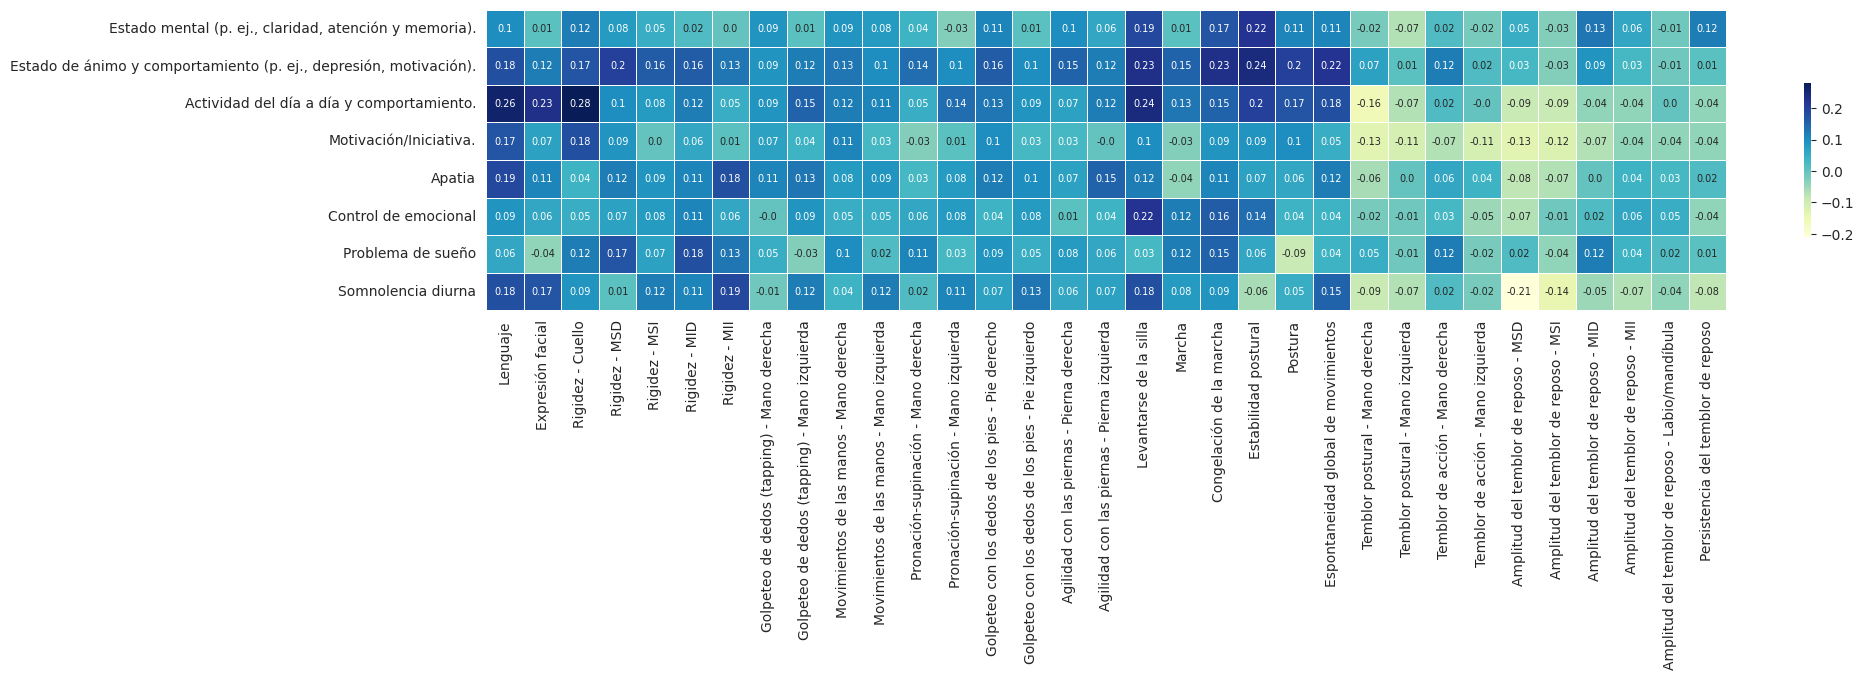

In [ ]:
updrs_cols_3 = [col for col in data.columns if "UPDRS3" in col]
data_cor = data[updrs_cols_1+updrs_cols_3].corr(method="spearman").round(2).loc[:"UPDRS1.8", "UPDRS3.1":]
data_cor.index = [replace_updrs[feat] for feat in data_cor.index]
data_cor.columns = [replace_updrs[feat] for feat in data_cor.columns]
fig, ax= plt.subplots(figsize=(20, 20))
ax.set_aspect('equal','box')
sns.heatmap(data_cor, annot=True, fmt='', cmap='YlGnBu', annot_kws={"size": 7}, linewidth=.5, cbar_kws={'shrink': 0.1})

###**Conclusiones**



En conclusión, el análisis detallado del conjunto de datos revela una rica interacción entre los síntomas motores y no motores en pacientes con enfermedad de Parkinson.

Este entendimiento detallado del dataset subraya la necesidad de estandarizar y limpiar los datos para mejorar la calidad del análisis. La estandarización de respuestas y la gestión adecuada de valores faltantes son pasos esenciales para asegurar la precisión en la interpretación de los datos, lo que a su vez puede facilitar el desarrollo de intervenciones más eficaces y ajustadas a las necesidades de cada paciente, contribuyendo a mejorar la calidad de vida y los resultados clínicos en la enfermedad de Parkinson.







###**Auto EDA**


In [ ]:
#!pip install dataprep
import pandas as pd
from dataprep.eda import create_report

Computing series-sum-agg-484426e4a7ed93ee1d20c45e7cf4cb6a:  69%|██████▉   | 4844/6978 [00:03<00:01, 1539.95it/s]                                   /usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.a

DataPrep Report
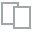
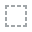
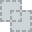
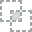
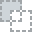
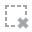
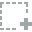
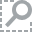
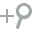
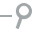
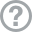
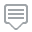
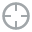
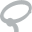
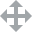
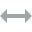
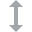
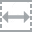
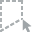
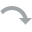
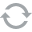
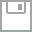
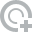
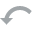
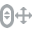
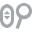
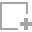
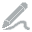
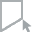
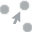
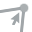
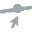

In [ ]:

df = data[categorical_columns+numeric_cols]
create_report(df)

In [ ]:
!pip install sweetviz
import sweetviz as sv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 26.8 MB/s eta 0:00:00


In [ ]:
analyze_report = sv.analyze(df)
analyze_report.show_html('report.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
